## Criando um modelo de predição com PCA

In [370]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [371]:
df = pd.read_csv('high_diamond_ranked_10min.csv')

In [372]:
df2 = df.drop(columns='gameId')

In [373]:
X = df2.drop(columns=['blueTotalGold']).to_numpy()
y = df2['blueTotalGold'].to_numpy()

### As duas próximas linhas fazem a verificação de infs e nans

In [374]:
np.isinf(X).any()

False

In [375]:
np.isnan(X).any()

False

### Número de linhas antes de o PCA ser aplicado

In [409]:
X.shape[1]

38

In [377]:
pca = PCA(n_components=4)

In [378]:
X_pca = pca.fit_transform(X)

### Número de linhas após o PCA ser aplicado

In [410]:
X_pca.shape[1]

4

### Separação em dados de treino e teste

In [380]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3)

## Regressão Linear (LLS)

In [381]:
linear = linear_model.LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [382]:
y_predict = linear.predict(X_test)

In [383]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.9999999827569741

In [384]:
comparison = pd.DataFrame()
comparison['Valor Real'] = y_test
comparison['Predição'] = y_predict
comparison.head(10)

,Valor Real,Predição
0,15321,15320.999179
1,20218,20218.328638
2,18722,18722.064731
3,15375,15374.697636
4,15843,15842.919988
5,17334,17333.703926
6,19704,19704.263456
7,19588,19588.515540
8,17215,17214.983152
9,16102,16101.681091


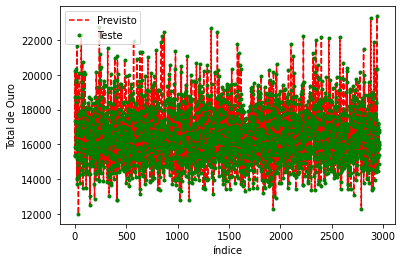

In [385]:
import matplotlib.pyplot as plt
plt.plot(range(y_predict.shape[0]), y_predict, 'r--')
plt.plot(range(y_test.shape[0]), y_test, 'g.')
plt.legend(['Previsto', 'Teste'])
plt.xlabel('índice')
plt.ylabel('Total de Ouro')
plt.show()

## Regressão de Ridge

In [386]:
ridge = linear_model.Ridge(alpha=32)
ridge.fit(X_train, y_train)

Ridge(alpha=32)

In [387]:
y_predict = ridge.predict(X_test)

In [388]:
ridge.score(X_test, y_test)

0.9999999827569711

In [389]:
comparison = pd.DataFrame()
comparison['Valor Real'] = y_test
comparison['Predição'] = y_predict
comparison.head(10)

,Valor Real,Predição
0,15321,15320.999172
1,20218,20218.328622
2,18722,18722.064727
3,15375,15374.697638
4,15843,15842.919997
5,17334,17333.703915
6,19704,19704.263439
7,19588,19588.515532
8,17215,17214.983157
9,16102,16101.681097


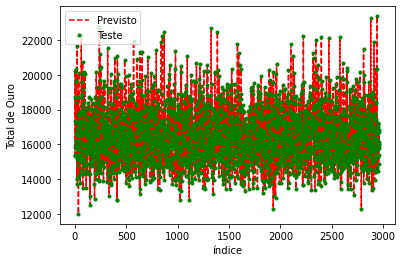

In [390]:
plt.plot(range(y_predict.shape[0]), y_predict, 'r--')
plt.plot(range(y_test.shape[0]), y_test, 'g.')
plt.legend(['Previsto', 'Teste'])
plt.xlabel('índice')
plt.ylabel('Total de Ouro')
plt.show()

## Lasso

In [391]:
lasso = linear_model.Lasso(alpha=45, max_iter=1300)
lasso.fit(X_train, y_train)

Lasso(alpha=45, max_iter=1300)

In [392]:
y_predict = lasso.predict(X_test)

In [393]:
lasso.score(X_test, y_test)

0.9999999796546766

In [394]:
comparison = pd.DataFrame()
comparison['Valor Real'] = y_test
comparison['Predição'] = y_predict
comparison.head(10)

,Valor Real,Predição
0,15321,15320.935153
1,20218,20218.185842
2,18722,18722.069519
3,15375,15374.721001
4,15843,15843.045836
5,17334,17333.625163
6,19704,19704.075257
7,19588,19588.383139
8,17215,17214.981277
9,16102,16101.682728


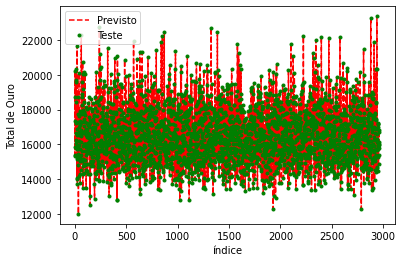

In [395]:
plt.plot(range(y_predict.shape[0]), y_predict, 'r--')
plt.plot(range(y_test.shape[0]), y_test, 'g.')
plt.legend(['Previsto', 'Teste'])
plt.xlabel('índice')
plt.ylabel('Total de Ouro')
plt.show()

## Elastic Net

In [396]:
enet = linear_model.ElasticNet(alpha=0.1)
enet.fit(X_train, y_train)

ElasticNet(alpha=0.1)

In [397]:
y_predict = enet.predict(X_test)

In [398]:
enet.score(X_test, y_test)

0.9999999827570124

In [399]:
comparison = pd.DataFrame()
comparison['Valor Real'] = y_test
comparison['Predição'] = y_predict
comparison.head(10)

,Valor Real,Predição
0,15321,15320.998951
1,20218,20218.328392
2,18722,18722.064787
3,15375,15374.697645
4,15843,15842.920248
5,17334,17333.703707
6,19704,19704.263092
7,19588,19588.515377
8,17215,17214.983236
9,16102,16101.681160


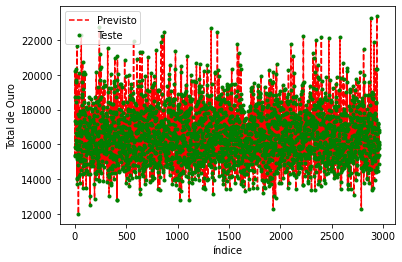

In [400]:
plt.plot(range(y_predict.shape[0]), y_predict, 'r--')
plt.plot(range(y_test.shape[0]), y_test, 'g.')
plt.legend(['Previsto', 'Teste'])
plt.xlabel('índice')
plt.ylabel('Total de Ouro')
plt.show()

## Utilização de Modelos de Conjunto

### Random Forest

In [401]:
from sklearn.ensemble import RandomForestRegressor
Forest = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0)
Forest.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [402]:
y_predict = Forest.predict(X_test)

In [403]:
Forest.score(X_test, y_test)

0.9846527002253137

In [404]:
comparison = pd.DataFrame()
comparison['Valor Real'] = y_test
comparison['Predição'] = y_predict
comparison.head(10)

,Valor Real,Predição
0,15321,15446.22
1,20218,20199.23
2,18722,18437.19
3,15375,15343.42
4,15843,15945.16
5,17334,17240.40
6,19704,19724.48
7,19588,19493.02
8,17215,17049.44
9,16102,16012.93


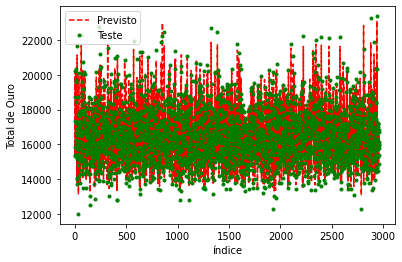

In [405]:
plt.plot(range(y_predict.shape[0]), y_predict, 'r--')
plt.plot(range(y_test.shape[0]), y_test, 'g.')
plt.legend(['Previsto', 'Teste'])
plt.xlabel('índice')
plt.ylabel('Total de Ouro')
plt.show()

### Extremely Randomized Trees

In [406]:
from sklearn.ensemble import ExtraTreesRegressor
Extra = ExtraTreesRegressor(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0)
Extra.fit(X_train, y_train)

ExtraTreesRegressor(random_state=0)

In [407]:
y_predict = Extra.predict(X_test)

In [408]:
Extra.score(X_test, y_test)

0.9915594271764124

### Mesmo com a implementação do PCA, os modelos ainda possuem scores bem próximos de 1.